In [2]:
from deepscreen_trypanosomatics import trainer
import pandas as pd

df_1075280 = pd.read_pickle('../data_procesing_filter/data_autores/CHEMBL1901.pickle')

trainer_1075280 = trainer('deepscreen.db')

2023-03-09 14:22:22:DEBUG    - trained_models table created


2023-03-09 14:22:24:DEBUG    - Neural Network config parameters changed to {'fully_layer_1': 512, 'fully_layer_2': 256, 'learning_rate': 0.001, 'batch_size': 32, 'drop_rate': 0.1, 'n_epoch': 30}
2023-03-09 14:22:24:WARNING  - There are some column with dtype diferent to "Int64. This issue is gonna get solved with convert_dtypes
2023-03-09 14:22:24:DEBUG    - targets for training: ['CHEMBL1901']...(total 1)
2023-03-09 14:22:24:INFO     - No trained model with target CHEMBL1901 and hyperparameters: fully_layer_1=512, fully_layer_2=256, learning_rate=0.001, batch_size=32, drop_rate=0.1, n_epoch=30 found in the database. Training new model.
2023-03-09 14:22:24:DEBUG    - training CHEMBL1901
2023-03-09 14:22:24:DEBUG    - molecules imgs stored in ../results//imgs_CHEMBL1901/
2023-03-09 14:22:24:INFO     - Training:CHEMBL1901-CNNModel1-512-256-0.001-32-0.1-30-CHEMBL1901
2023-03-09 14:22:24:WARNING  - using cpu for training
2023-03-09 14:22:24:DEBUG    - dataloaders generator train_random_spl

True

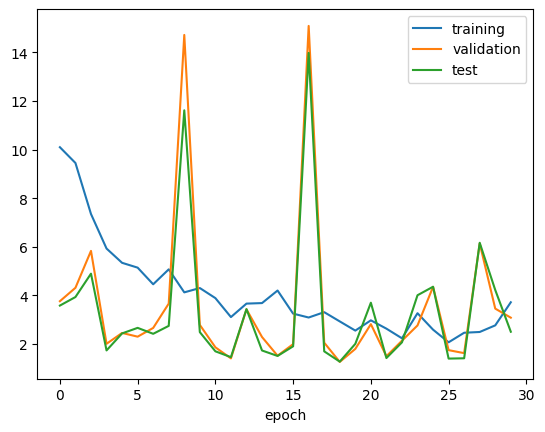

In [3]:
trainer_1075280.change_config_nn(n_epoch=30)
trainer_1075280.train(df_1075280,'../results/',plot_epoch_loss=True)

In [15]:
from deepscreen_trypanosomatics import deepscreen_db_read

db_reader = deepscreen_db_read('deepscreen_2.db')

df = db_reader.get_trained_models()

ep_lo = df.loc[0,'epoch_vs_loss']

2023-03-06 16:59:27:DEBUG    - trained_models table already exists


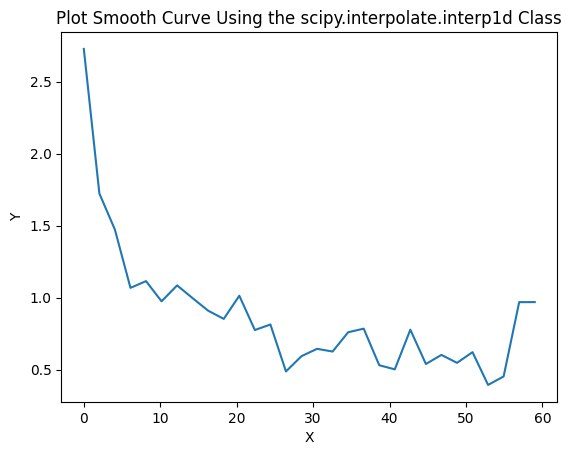

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_figure'

In [32]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
x=ep_lo.epoch
y=ep_lo.loss
 
cubic_interpolation_model = interp1d(x, y, kind = "linear")
 
# Plotting the Graph
X_=np.linspace(x.min(), x.max(), 30)
Y_=cubic_interpolation_model(X_)
 
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.savefig